In [1]:
!wget https://pjreddie.com/media/files/mnist_train.csv
!wget https://github.com/Naxalov/ComputerVision/raw/master/MNIST_TEST/mnist_test.zip

--2021-06-30 16:32:53--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [application/octet-stream]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  23.0MB/s    in 5.3s    

2021-06-30 16:32:58 (19.9 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]

--2021-06-30 16:32:59--  https://github.com/Naxalov/ComputerVision/raw/master/MNIST_TEST/mnist_test.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/MNIST_TEST/mnist_test.zip [following]
--2021-06-30 16:32:59--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/MNIST_TEST/mnist_test.zip
Reso

In [2]:
!unzip mnist_test.zip

Archive:  mnist_test.zip
   creating: mnist_test/
  inflating: mnist_test/test_15.jpg  
  inflating: mnist_test/test_14.jpg  
  inflating: mnist_test/test_13.jpg  
  inflating: mnist_test/test_12.jpg  
  inflating: mnist_test/test_11.jpg  
  inflating: mnist_test/test_10.jpg  
  inflating: mnist_test/test_9.jpg   
  inflating: mnist_test/test_7.jpg   
  inflating: mnist_test/test_6.jpg   
  inflating: mnist_test/test_5.jpg   
  inflating: mnist_test/test_4.jpg   
  inflating: mnist_test/test_3.jpg   
  inflating: mnist_test/test_2.jpg   
  inflating: mnist_test/test_1.jpg   
  inflating: mnist_test/test_8.jpg   


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns
import pathlib

In [4]:
data = np.genfromtxt('mnist_train.csv', delimiter=',')

In [5]:
x = data[:, 1:]
y = data[:, 0]

In [6]:
def digit_show(x, label):
    img = x.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(str(int(label)), fontsize=20)
    plt.axis('off')
    plt.show()

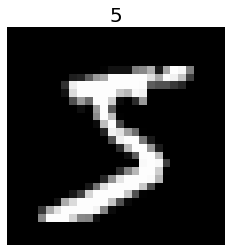

In [7]:
digit_show(x[0], y[0])

In [8]:
print(y[:5])
print(x[:5])

[5. 0. 4. 1. 9.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
x = x.reshape(-1,28,28)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [12]:
print(y_train.shape)

(42000, 10)


In [13]:
model = Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 7s 5ms/step - loss: 2.3311 - accuracy: 0.8802 - val_loss: 0.6021 - val_accuracy: 0.9186
Epoch 2/15
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4268 - accuracy: 0.9309 - val_loss: 0.4968 - val_accuracy: 0.9251
Epoch 3/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2681 - accuracy: 0.9442 - val_loss: 0.3049 - val_accuracy: 0.9376
Epoch 4/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1838 - accuracy: 0.9550 - val_loss: 0.2598 - val_accuracy: 0.9446
Epoch 5/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1587 - accuracy: 0.9596 - val_loss: 0.2214 - val_accuracy: 0.9461
Epoch 6/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1313 - accuracy: 0.9629 - val_loss: 0.1707 - val_accuracy: 0.9573
Epoch 7/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1220 - accuracy: 0.9655 - val_loss: 0.1575 - val_accuracy:

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(15)

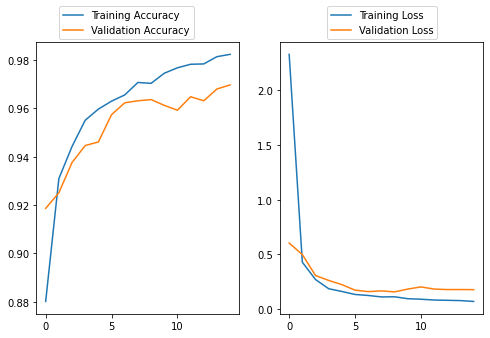

In [16]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

<function matplotlib.pyplot.show>

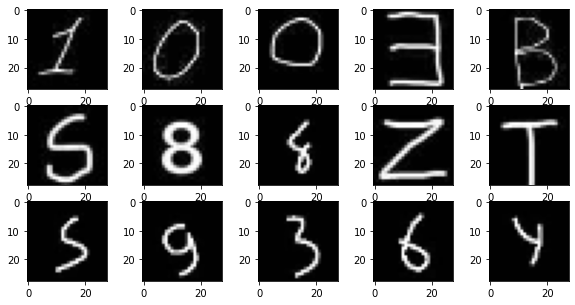

In [17]:
plt.figure(figsize=(10,5))
prediction = []
for i in range(1, 16):
    img = cv2.imread(f'/content/mnist_test/test_{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28))
    plt.subplot(3,5,i)
    plt.imshow(img, cmap='gray')
    y_hat_test = model.predict(np.array([img]))
    prediction.append(np.argmax(y_hat_test))
plt.show

In [18]:
label_dir = pathlib.Path('mnist_test')
lst = label_dir.glob('*.*')
labels = []
for i in lst:
    labels.append(int(i.stem[5:]))
labels = sorted(labels)

In [19]:
print(labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [20]:
labels[1] = 0
labels[2] = 0
labels[3] = 3
labels[4] = 8
labels[5] = 5
labels[6] = 8
labels[7] = 8
labels[8] = 2
labels[9] = 1
labels[10] = 5
labels[11] = 9
labels[12] = 3
labels[13] = 6
labels[14] = 4

In [21]:
print(labels)
print(prediction)

[1, 0, 0, 3, 8, 5, 8, 8, 2, 1, 5, 9, 3, 6, 4]
[1, 0, 0, 5, 8, 5, 8, 1, 3, 3, 3, 9, 3, 6, 4]


In [24]:
confusion_matrix = tf.math.confusion_matrix(labels,prediction)

In [25]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)>

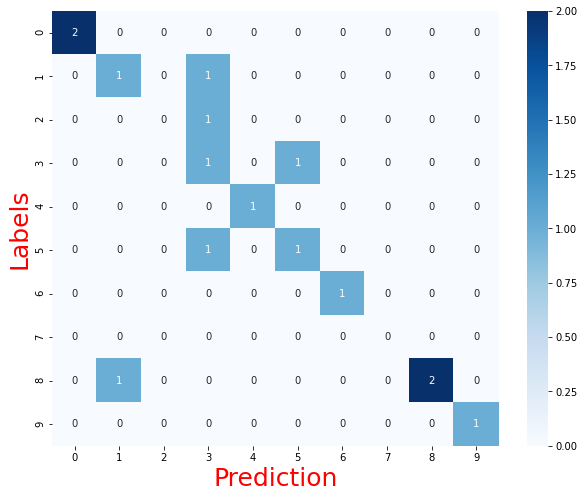

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()

<function matplotlib.pyplot.show>

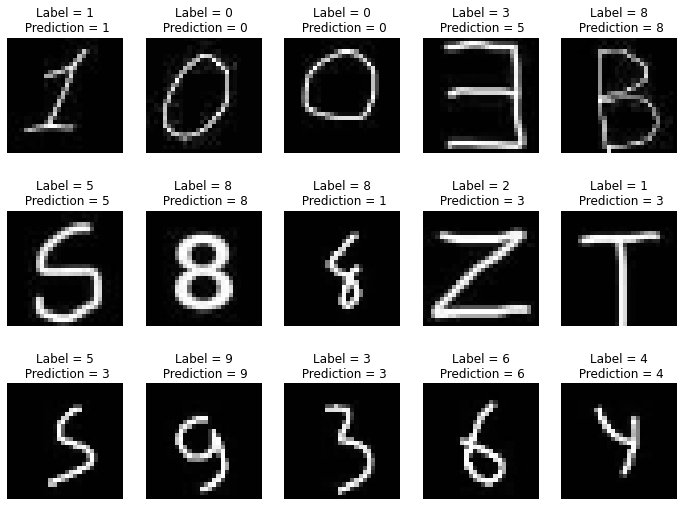

In [22]:
plt.figure(figsize=(12,9))
for i in range(1, 16):
    img = cv2.imread(f'/content/mnist_test/test_{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28))
    plt.subplot(3,5,i)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label = {labels[i-1]}\n Prediction = {prediction[i-1]}', fontsize=12)
    plt.axis('off')
plt.show